# 1) Problema de Regresión

## Dataset: Californa Housing


### Módulos sklearn parámetros
1. **LinearRegresion:**
   - fit_intercept: Booleano, True por default. Indica si se calcula la intersección o no por medio de False y True. En caso de que se use False no se realizará este cálculo, singificando que se espera que los datos estén centrados.
   - copy_X: Booleano, True por default. Si se usa True se copia X, pero si se usa False X se sobreescribirá.
   - tol: Float, 1e-6 por default. Determina la precision de la solucion (coef_), es un criterio de convergencia diferente para lsqr. No tiene efecto al usar datos densos.
   - n_jobs: Integer, None por default. Cantidad de trabajos que se usarán para el cálculo, da aceleración en caso de un caso lo suficientemente grande. Pero debe cumplir con n_targets > 1, X es pequeño o si positive es True.
   - positive: Booleano, False por default. Cuando es True hace que los coeficientes sean positivos, solo funciona para arrays densos.

2. **DecisionTreeRegressor:**
    - criterion: Mide calidad de un split, "squared_error" por defualt. Se puede hacer uso de "squared_error", “friedman_mse”, “absolute_error” y “poisson”
    - splitter: Estrategia para elegir el split en cada nodo, "best" se usa para elegir el mejor split (este es el default) y "random" el mejor random split.
    - max_depth: Integer, None por default. Profundidad maxima del arbol, Si "None" las hojas del arbol se expandiran hasta que sean puras o hasta que todas tengan menos samples que "min_samples_split"
    - min_samples_split: Integer o Float, 2 por default. Número minimo de samples requeridos para hacer el split en un nodo interno. Si es Int se debe considerar "min_samples_split" como el numero minimo, en cambio con Float "ceil(min_samples_split * n_samples)" es el minimo (min_samplessplit por si solo es fraccion)
    - min_samples_leaf: Integer o Float, 1 por default. El minimo de samples requerido para una hoja, 
    - min_weight_fraction_leaf: Float, 0 por default. Fracción mínima ponderada del total de pesos que debe tener una hoja.
    - max_feature: Integer, Float, string o None, "None" por default. Número de features a considerar para el mejor split: "auto" y "sqrt" son raíz cuadrada, "log2" es log2, None es todas, Int es cantidad directa, Float es fracción.
    - random_state: Integer, RandomState instance o None, None por default. Controla la aleatoriedad del estimador.
    - max_leaf_nodes: Integer, None por default. Máximo número de hojas. Si None, número ilimitado.
    - min_impurity_decrease: Float, 0.0 por default. Reducción mínima de impureza requerida para hacer un split.
    - ccp_alpha: Float, 0.0 por default. Parámetro de complejidad para poda por costo-complejidad.
    - monotonic_cst: array-like de int de forma (n_features), None por default. Indica restricciones de monotonicidad por feature (1: creciente, -1: decreciente, 0: sin restricción).

3. **RandomForestRegressor:**
    - n_estimators: Integer, 100 por default. Número de árboles en el bosque.
    - criterion: String, "squared_error" por default. Función para medir calidad del split. Opciones: "squared_error", "absolute_error", "friedman_mse", "poisson".
    - max_depth: Integer, None por default. Profundidad máxima del árbol. Si None, expande hasta min_samples_split.
    - min_samples_split: Integer o Float, 2 por default. Mínimo samples para dividir un nodo.
    - min_samples_leaf:Integer o Float, 1 por default. Mínimo samples requeridos en una hoja.
    - min_weight_fraction_leaf: Float, 0.0 por default. Fracción mínima ponderada del peso total para estar en hoja.
    - max_features:String, Integer, Float o None, "sqrt" por default. Número de features a considerar para mejor split: "sqrt" y "auto" son raíz cuadrada, "log2" es log2, None es todas, Int es cantidad, Float es fracción.
    - max_leaf_nodes: Integer, None por default. Máximo número de hojas.
    - min_impurity_decrease: Float, 0.0 por default. Reducción mínima de impureza para hacer split.
    - bootstrap: Booleano, True por default. Si usa bootstrap samples al construir árboles.
    - oob_score: Booleano, False por default. Si usa out-of-bag samples para estimar score de generalización.
    - n_jobs: Integer, None por default. Número de trabajos en paralelo.
    - random_state: Integer, RandomState instance o None, None por default. Controla aleatoriedad.
    - verbose: Integer, 0 por default. Controla nivel de verbosidad.
    - warm_start: Booleano, False por default. Si True, reutiliza solución de llamada anterior para añadir más estimadores.
    - ccp_alpha: Float, 0.0 por default. Parámetro para poda por costo-complejidad.
    - max_samples: Integer o Float, None por default. Si bootstrap es True, número de muestras a extraer de X para entrenar cada árbol. Int es número absoluto, Float es fracción. None usa n_samples.
    - monotonic_cst: Array-like de int con forma n_features, None por default. Restricciones de monotonicidad por feature.

In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
#estilo
plt.style.use('seaborn-v0_8')

#CARGAR DATOS
print("Cargando dataset California Housing")
housing = fetch_california_housing(as_frame=True)
print(f"\nColumnas en .frame: {housing.frame.columns.tolist()}")

Cargando dataset California Housing

Columnas en .frame: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


----------------------------------------
	INFORMACION INICIAL
----------------------------------------
**   Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

**   Estadisticas descriptivas:
                mean      std     min     25%      50%      75%       max  \
MedInc          3.87     1.90    0.50    2.56     3.53     4.74     15.00   
HouseAge       28.64    12.59    1.00   18.00    29.00    37.00     

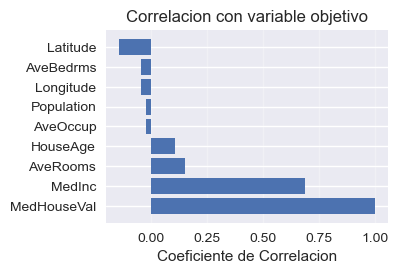

In [4]:
#datos a DF
df = housing.frame
X = df.drop('MedHouseVal', axis=1)
Y = df['MedHouseVal']

#ESTADISTICAS BASICAS
print("-"*40)
print("\tINFORMACION INICIAL")
print("-"*40)
print("**   Información general:\n")
print(df.info())
print("\n**   Estadisticas descriptivas:")
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['CV'] = (stats['std'] / stats['mean']).round(3)  # Coeficiente de variación
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'CV']].round(2))
print("\n**   Valores nulos por columna:")
print(df.isnull().sum())
print("\n**   Analisis distribucion vairable objetivo y correlaciones entre varaibles:")
print("\t- Distribucion variable objetivo (MedHouseVal):")
print(f"\t\t• Media: ${Y.mean()*100000:,.0f}")
print(f"\t\t• Mediana: ${Y.median()*100000:,.0f}")
print(f"\t\t• Rango: ${Y.min()*100000:,.0f} a ${Y.max()*100000:,.0f}")
print(f"\t\t• Asimetría: {Y.skew():.3f} {'(positiva - cola derecha)' if Y.skew() > 0 else '(negativa)'}\n")
print("\t- Correlaciones entre variables:")
#correlaciones var. obj
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['MedHouseVal'].sort_values(ascending=False)

print("\tCorrelaciones con MedHouseVal (mayor-menor):")
for var, corr in corr_with_target.items():
    strength = "fuerte" if abs(corr) > 0.5 else "Moderada" if abs(corr) > 0.3 else "debil"
    direction = "positiva" if corr > 0 else "negativa"
    print(f"{var:15s}: {corr:6.3f} ({strength} {direction})")
    
#grafico correalcion entre variables
plt.subplot(2, 2, 2)
bars = plt.barh(range(len(corr_with_target)), corr_with_target.values)
plt.yticks(range(len(corr_with_target)), corr_with_target.index)
plt.xlabel('Coeficiente de Correlacion')
plt.title('Correlacion con variable objetivo')
plt.grid(True, alpha=0.3, axis='x')


#SEPARACION DE DATOS 
print("-"*40)
print("\tSEPARACION DE DATOS")
print("-"*40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\t**Division de datos (cantidad de muestras):")
print(f"\t-Entrenamiento: {X_train.shape[0]}")
print(f"\t-Prueba: {X_test.shape[0]}")

#ESCALAR DATOS
print("-"*40)
print("\t   ESCALAR DATOS")
print("-"*40)
print("--- Escalando datos ---")
print(".")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("..")
X_test_scaled = scaler.transform(X_test)
print("...")
print("....Datos escalados....")

### 1. **Regresión Lineal**

	REGRESION	LINEAL
	 ENTRENAMIENTO
----------------------------------------
Modelo Regresion Lineal: Entrenado
   ** Coeficientes:
  Intercepto: 2.0719
   ** Coeficientes de caracteristicas:
   1. MedInc         :   0.8544
   2. HouseAge       :   0.1225
   3. AveRooms       :  -0.2944
   4. AveBedrms      :   0.3393
   5. Population     :  -0.0023
   6. AveOccup       :  -0.0408
   7. Latitude       :  -0.8969
   8. Longitude      :  -0.8698
----------------------------------------
	PREDICCIONES Y METRICAS
----------------------------------------
   ** Metricas de evaluacion:
	•MAE: 0.5332
	•RMSE: 0.7456
	•R2: 0.5758
----------------------------------------
	   GRAFICAS
----------------------------------------


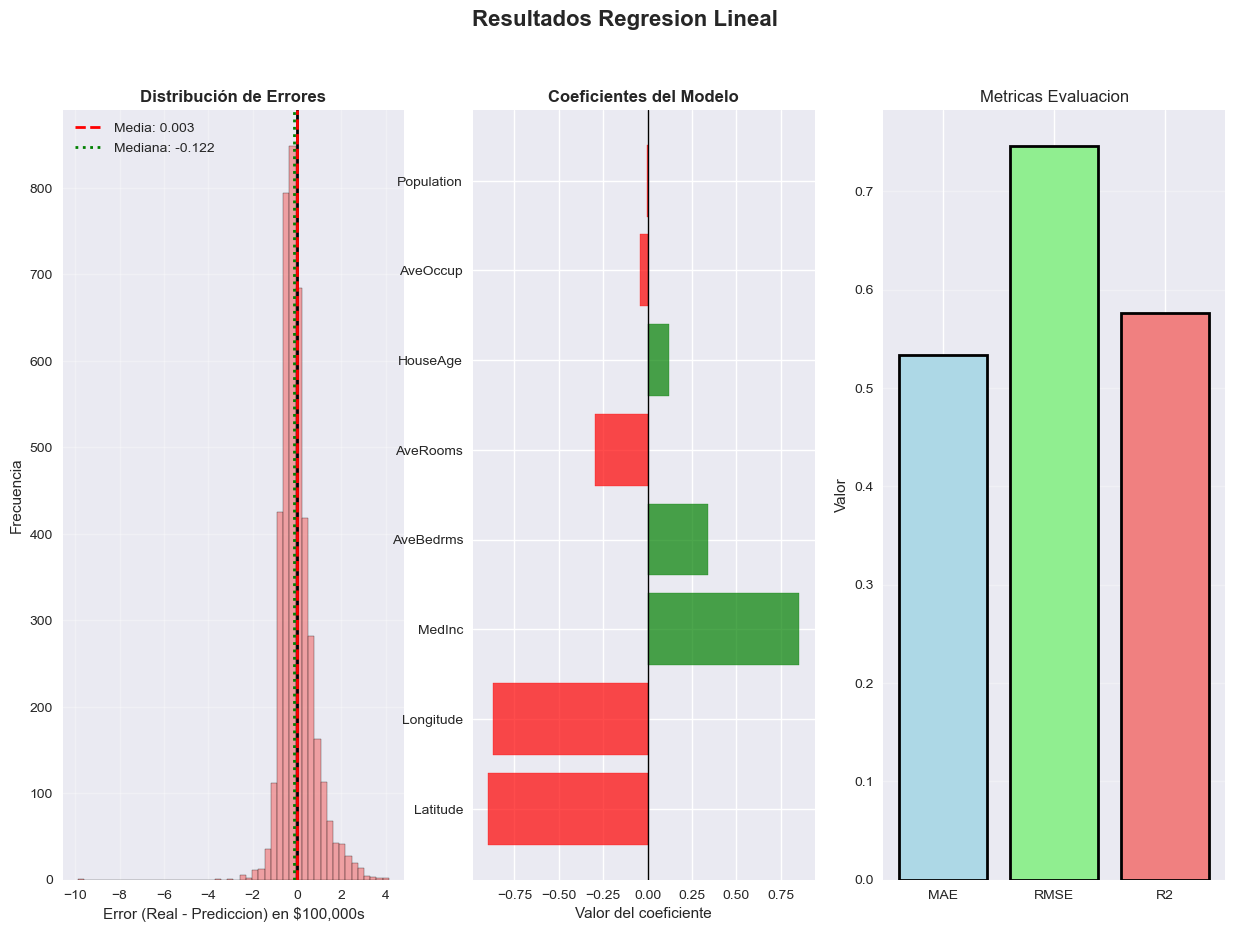

In [6]:
print("\tREGRESION\tLINEAL")
print("="*40)
print("\t ENTRENAMIENTO")
print("-"*40)
modeloRL = LinearRegression()
modeloRL.fit(X_train_scaled, Y_train)
print("Modelo Regresion Lineal: Entrenado")

#coeficientes
print("   ** Coeficientes:")
print(f"  Intercepto: {modeloRL.intercept_:.4f}")

print("   ** Coeficientes de caracteristicas:")
for i, (coef, feature) in enumerate(zip(modeloRL.coef_, X.columns), 1):
    print(f"  {i:2d}. {feature:15s}: {coef:8.4f}")
#predicciones
print("-"*40)
print("\tPREDICCIONES Y METRICAS")
print("-"*40)
Y_pred_RL = modeloRL.predict(X_test_scaled)
#metricas
MAE_RL = mean_absolute_error(Y_test, Y_pred_RL)
MSE_RL = mean_squared_error(Y_test, Y_pred_RL)
RMSE_RL = np.sqrt(MSE_RL)
R2_RL = r2_score(Y_test, Y_pred_RL)
print("   ** Metricas de evaluacion:")
print(f"\t•MAE: {MAE_RL:.4f}")
print(f"\t•RMSE: {RMSE_RL:.4f}")
print(f"\t•R2: {R2_RL:.4f}")

print("-"*40)
print("\t   GRAFICAS")
print("-"*40)
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
fig.suptitle('Resultados Regresion Lineal', fontsize=16, fontweight='bold')

#Dist errores
errores = Y_test-Y_pred_RL
axes[0].hist(errores, bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=2)
axes[0].axvline(x=errores.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {errores.mean():.3f}')
axes[0].axvline(x=errores.median(), color='green', linestyle=':', linewidth=2, label=f'Mediana: {errores.median():.3f}')
axes[0].set_xlabel('Error (Real - Prediccion) en $100,000s')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Errores', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#Coeficientes del modleo
coeficientes = pd.Series(modeloRL.coef_, index=X.columns)
coeficientes_abs = coeficientes.abs().sort_values(ascending=False)
coeficientes_ordenados = coeficientes[coeficientes_abs.index]
bars = axes[1].barh(range(len(coeficientes_ordenados)), coeficientes_ordenados.values)
for i, bar in enumerate(bars):
    if coeficientes_ordenados.values[i] >= 0:
        bar.set_color('green')
        bar.set_alpha(0.7)
    else:
        bar.set_color('red')
        bar.set_alpha(0.7)

axes[1].set_yticks(range(len(coeficientes_ordenados)))
axes[1].set_yticklabels(coeficientes_ordenados.index)
axes[1].set_xlabel('Valor del coeficiente')
axes[1].set_title('Coeficientes del Modelo', fontweight='bold')
axes[1].axvline(x=0, color='black', linewidth=1)

#comparacion metricas
metricas = ['MAE', 'RMSE', 'R2']
valores = [MAE_RL, RMSE_RL, R2_RL]
colors = ['lightblue', 'lightgreen', 'lightcoral']
bars = axes[2].bar(metricas, valores, color=colors, edgecolor='black', linewidth=2)

axes[2].set_ylabel('Valor')
axes[2].set_title('Metricas Evaluacion')
axes[2].grid(True, alpha=0.3, axis='y')

### 2. **Árbol de Decisión para Regresión**

In [8]:
print("\tARBOL DE DECISION PARA REGRESION")
print("="*40)
print("\t ENTRENAMIENTO")
print("-"*40)
modeloDT = DecisionTreeRegressor(random_state=42) #no es necesario poner los datos escalados en este modelo (no en random forest)
modeloDT.fit(X_train, Y_train)
print("Modelo Arbol de Decision: Entrenado\n")

#Predicciones
print("-"*40)
print("\tPREDICCIONES Y METRICAS")
print("-"*40)
Y_pred_DT = modeloDT.predict(X_test)

MAE_DT = mean_absolute_error(Y_test, Y_pred_DT)
RMSE_DT = np.sqrt(mean_squared_error(Y_test, Y_pred_DT))
R2_DT = r2_score(Y_test, Y_pred_DT)
print("   ** Metricas de evaluacion:")
print(f"\t•MAE: {MAE_DT:.4f}")
print(f"\t•RMSE: {RMSE_DT:.4f}")
print(f"\t•R2: {R2_DT:.4f}\n")

#GridSearch
print("-"*40)
print("\tGRID SEARCH")
print("-"*40)
#parametros grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

print("   ** Parámetros a optimizar:")
for param, values in param_grid_dt.items():
    print(f"\t•{param}: {values}")

grid_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=0
)
print("\n..Corriendo GridSearchCV..")
grid_dt.fit(X_train, Y_train)
print("...")
print("..")
print(".")

print("\n   ** Mejores parametros encontrados:")
for param, value in grid_dt.best_params_.items():
    print(f"\t•{param}: {value}")
#modelo opt
modeloDT_opt = grid_dt.best_estimator_
Y_pred_DT_opt = modeloDT_opt.predict(X_test)

MAE_DT_opt = mean_absolute_error(Y_test, Y_pred_DT_opt)
RMSE_DT_opt = np.sqrt(mean_squared_error(Y_test, Y_pred_DT_opt))
R2_DT_opt = r2_score(Y_test, Y_pred_DT_opt)

print("   ** Metricas de evaluacion (GridSearchCV):")
print(f"\t•MAE: {MAE_DT_opt:.4f}")
print(f"\t•RMSE: {RMSE_DT_opt:.4f}")
print(f"\t•R2: {R2_DT_opt:.4f}")

	ARBOL DE DECISION PARA REGRESION
	 ENTRENAMIENTO
----------------------------------------
Modelo Arbol de Decision: Entrenado

----------------------------------------
	PREDICCIONES Y METRICAS
----------------------------------------
   ** Metricas de evaluacion:
	•MAE: 0.4547
	•RMSE: 0.7037
	•R2: 0.6221

----------------------------------------
	GRID SEARCH
----------------------------------------
   ** Parámetros a optimizar:
	•max_depth: [None, 5, 10, 15, 20]
	•min_samples_split: [2, 5, 10]
	•min_samples_leaf: [1, 2, 4]
	•max_features: [None, 'sqrt', 'log2']

..Corriendo GridSearchCV..
...
..
.

   ** Mejores parametros encontrados:
	•max_depth: 10
	•max_features: None
	•min_samples_leaf: 4
	•min_samples_split: 2
   ** Metricas de evaluacion (GridSearchCV):
	•MAE: 0.4311
	•RMSE: 0.6391
	•R2: 0.6883


### 3. **Random Forest para Regresión**

In [10]:
print("\tRANDOM FOREST PARA REGRESION")
print("="*40)
print("\t ENTRENAMIENTO")
print("-"*40)

modeloRF = RandomForestRegressor(random_state=42)
modeloRF.fit(X_train, Y_train)
print("Modelo Random Forest: Entrenado")

Y_pred_RF = modeloRF.predict(X_test)

MAE_RF = mean_absolute_error(Y_test, Y_pred_RF)
RMSE_RF = np.sqrt(mean_squared_error(Y_test, Y_pred_RF))
R2_RF = r2_score(Y_test, Y_pred_RF)
print("   ** Metricas de evaluacion:")
print(f"\t•MAE: {MAE_RF:.4f}")
print(f"\t•RMSE: {RMSE_RF:.4f}")
print(f"\t•R2: {R2_RF:.4f}")

#GridSearch
print("-"*40)
print("\tGRID SEARCH")
print("-"*40)
#parametros grid
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=0
)

print("   ** Ejecutando GridSearchCV...")
grid_rf.fit(X_train, Y_train)
print(f"   ** Mejores parámetros encontrados:")
for param, value in grid_rf.best_params_.items():
    print(f"      • {param}: {value}")

modeloRF_opt = grid_rf.best_estimator_
Y_pred_RF_opt = modeloRF_opt.predict(X_test)

MAE_RF_opt = mean_absolute_error(Y_test, Y_pred_RF_opt)
RMSE_RF_opt = np.sqrt(mean_squared_error(Y_test, Y_pred_RF_opt))
R2_RF_opt = r2_score(Y_test, Y_pred_RF_opt)

print("   ** Metricas de evaluacion (GridSearchCV):")
print(f"\t•MAE: {MAE_RF_opt:.4f}")
print(f"\t•RMSE: {RMSE_RF_opt:.4f}")
print(f"\t•R2: {R2_RF_opt:.4f}")

	RANDOM FOREST PARA REGRESION
	 ENTRENAMIENTO
----------------------------------------
Modelo Random Forest: Entrenado
   ** Metricas de evaluacion:
	•MAE: 0.3275
	•RMSE: 0.5053
	•R2: 0.8051
----------------------------------------
	GRID SEARCH
----------------------------------------
   ** Ejecutando GridSearchCV...
   ** Mejores parámetros encontrados:
      • max_depth: 20
      • max_features: sqrt
      • min_samples_leaf: 1
      • min_samples_split: 2
      • n_estimators: 150
   ** Metricas de evaluacion (GridSearchCV):
	•MAE: 0.3310
	•RMSE: 0.4981
	•R2: 0.8107


### 4. **Comparacion**

	COMPARACION MODELOS
                          Modelo    MAE   RMSE     R2
                Regresion Lineal 0.5332 0.7456 0.5758
               Arbol de Decision 0.4547 0.7037 0.6221
Arbol de Decision (GridSearchCV) 0.4311 0.6391 0.6883
                   Random Forest 0.3275 0.5053 0.8051
    Random Forest (GridSearchCV) 0.3310 0.4981 0.8107

• Mejor MAE: Random Forest (0.3275)
• Mejor RMSE: Random Forest (GridSearchCV) (0.4981)
• Mejor R2: Random Forest (GridSearchCV) (0.8107)
----------------------------------------
	 GRAFICAS
----------------------------------------


C:\Users\abbyd\AppData\Local\Temp\ipykernel_14988\2846289749.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(modelos_nombres, rotation=45, ha='right')
C:\Users\abbyd\AppData\Local\Temp\ipykernel_14988\2846289749.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(modelos_nombres, rotation=45, ha='right')
C:\Users\abbyd\AppData\Local\Temp\ipykernel_14988\2846289749.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(modelos_nombres, rotation=45, ha='right')


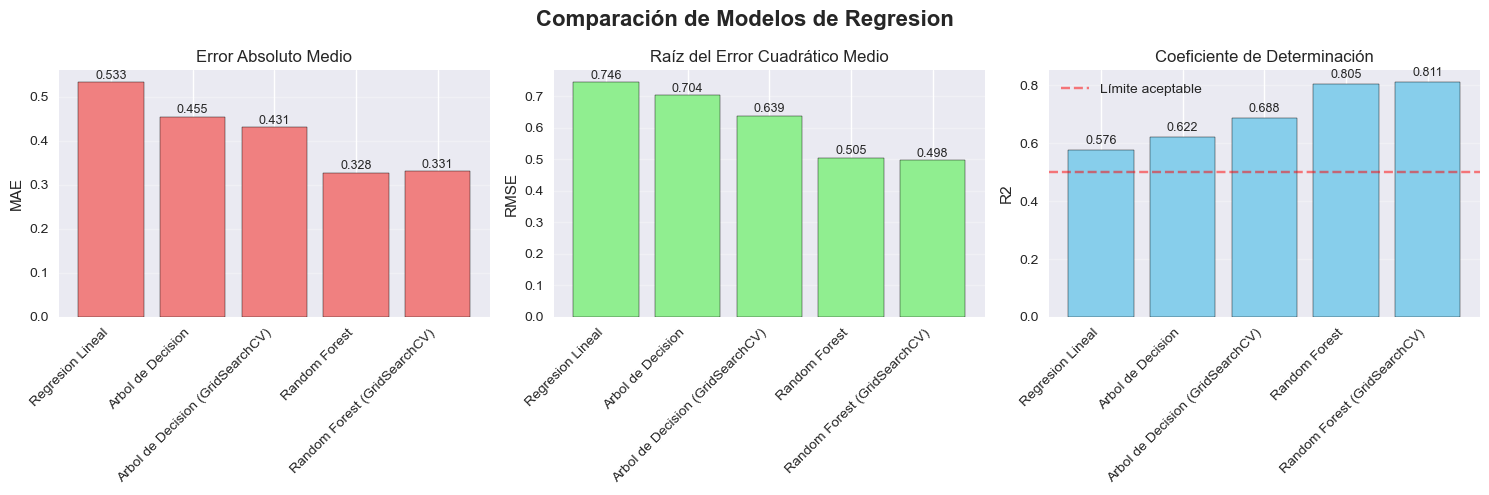

In [12]:
print("\tCOMPARACION MODELOS")
print("="*40)

comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresion Lineal', 'Arbol de Decision', 'Arbol de Decision (GridSearchCV)', 
               'Random Forest', 'Random Forest (GridSearchCV)'],
    'MAE': [MAE_RL, MAE_DT, MAE_DT_opt, MAE_RF, MAE_RF_opt],
    'RMSE': [RMSE_RL, RMSE_DT, RMSE_DT_opt, RMSE_RF, RMSE_RF_opt],
    'R2': [R2_RL, R2_DT, R2_DT_opt, R2_RF, R2_RF_opt]
})
print(comparacion_modelos.round(4).to_string(index=False))

#Mejores daots
print(f"\n• Mejor MAE: {comparacion_modelos.loc[comparacion_modelos['MAE'].idxmin(), 'Modelo']} ({comparacion_modelos['MAE'].min():.4f})")
print(f"• Mejor RMSE: {comparacion_modelos.loc[comparacion_modelos['RMSE'].idxmin(), 'Modelo']} ({comparacion_modelos['RMSE'].min():.4f})")
print(f"• Mejor R2: {comparacion_modelos.loc[comparacion_modelos['R2'].idxmax(), 'Modelo']} ({comparacion_modelos['R2'].max():.4f})")

print("-"*40)
print("\t GRAFICAS")
print("-"*40)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Comparación de Modelos de Regresion', fontsize=16, fontweight='bold')

modelos_nombres = comparacion_modelos['Modelo'].values

#comparacion mae
axes[0].bar(modelos_nombres, comparacion_modelos['MAE'], color='lightcoral', edgecolor='black')
axes[0].set_ylabel('MAE')
axes[0].set_title('Error Absoluto Medio')
axes[0].set_xticklabels(modelos_nombres, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(comparacion_modelos['MAE']):
    axes[0].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

#comp rwmse
axes[1].bar(modelos_nombres, comparacion_modelos['RMSE'], color='lightgreen', edgecolor='black')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Raíz del Error Cuadrático Medio')
axes[1].set_xticklabels(modelos_nombres, rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(comparacion_modelos['RMSE']):
    axes[1].text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

#comp r2
axes[2].bar(modelos_nombres, comparacion_modelos['R2'], color='skyblue', edgecolor='black')
axes[2].set_ylabel('R2')
axes[2].set_title('Coeficiente de Determinación')
axes[2].set_xticklabels(modelos_nombres, rotation=45, ha='right')
axes[2].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Límite aceptable')
axes[2].grid(True, alpha=0.3, axis='y')
axes[2].legend()

for i, v in enumerate(comparacion_modelos['R2']):
    axes[2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2) Problema de Clasificación Binaria

## Dataset: Breast Cancer Wisconsin

In [15]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#Cargar datos
print("Cargando dataset Breast Cancer Wisconsin")
breast_cancer = load_breast_cancer(as_frame=True)
print(f"\nColumnas en .frame: {breast_cancer.frame.columns.tolist()}")

Cargando dataset Breast Cancer Wisconsin

Columnas en .frame: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']


----------------------------------------
	INFORMACION INICIAL
----------------------------------------
**   Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  peri

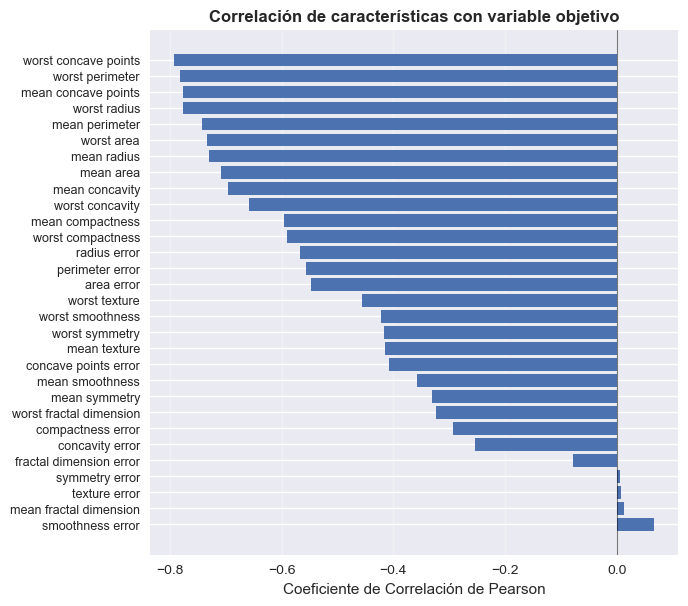


**   Balance de clases:
	 - Distribucion clase objetivo (target)

	• Clase 0 - malignant: 212 muestras (37.3%)
	• Clase 1 - benign: 357 muestras (62.7%)

	• Estado: Clase objetivo no balanceada (diferencia: 25.5%)
----------------------------------------
	SEPARACION DE DATOS
----------------------------------------
	**Division de datos (cantidad de muestras):
	-Entrenamiento: 455
	-Prueba: 114
----------------------------------------
	   ESCALAR DATOS
----------------------------------------
--- Escalando datos ---
.
..
...
....Datos escalados....
----------------------------------------
	   GRAFICAS
----------------------------------------


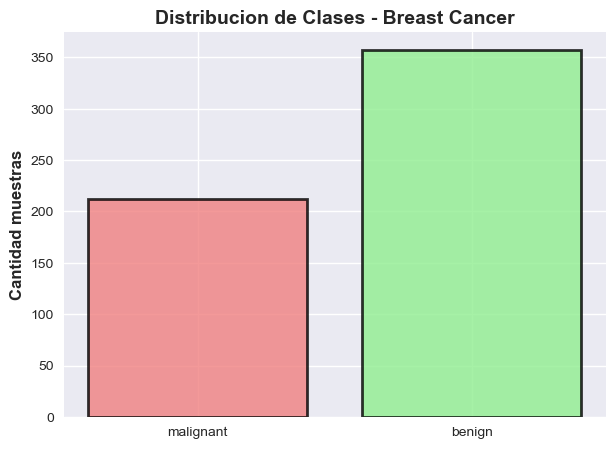

In [16]:
#datos a DF
df = breast_cancer.frame
X = df.drop('target', axis=1)
Y = df['target']

#ESTADISTICAS BASICAS
print("-"*40)
print("\tINFORMACION INICIAL")
print("-"*40)

print("**   Información general:\n")
print(df.info())

print("\n**   Estadisticas descriptivas:")
stats = df.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats['CV'] = (stats['std'] / stats['mean']).round(3)  # Coeficiente de variación
print(stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR', 'CV']].round(2))

print("\n**   Valores nulos por columna:")
print(df.isnull().sum())

print("\n**   Analisis distribucion vairable objetivo y correlaciones entre varaibles:")
print("\t- Analisis variable objetivo (target):")
print(f"\t\t• Media: ${Y.mean()*100000:,.0f}")
print(f"\t\t• Mediana: ${Y.median()*100000:,.0f}")
print(f"\t\t• Rango: ${Y.min()*100000:,.0f} a ${Y.max()*100000:,.0f}")
print(f"\t\t• Asimetría: {Y.skew():.3f} {'(positiva - cola derecha)' if Y.skew() > 0 else '(negativa)'}\n")
print("\t- Correlaciones:")

#correlaciones var. obj
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['target'].sort_values(ascending=False)

print("\tCorrelaciones con target (mayor-menor):")
for var, corr in corr_with_target.items():
    if var != 'target':
        strength = "Fuerte" if abs(corr) > 0.5 else "Moderada" if abs(corr) > 0.3 else "Debil"
        direction = "positiva" if corr > 0 else "negativa"
        print(f"\t{var:25s}: {corr:6.4f} ({strength} {direction})")
    
#grafico correalcion
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
corr_sin_target = corr_with_target.drop('target')
bars = plt.barh(range(len(corr_sin_target)), corr_sin_target.values)
plt.yticks(range(len(corr_sin_target)), corr_sin_target.index, fontsize=9)
plt.xlabel('Coeficiente de Correlación de Pearson', fontsize=11)
plt.title('Correlación de características con variable objetivo', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8, alpha=0.5)
plt.show()

#Balance de classes
print("\n**   Balance de clases:")
print("\t - Distribucion clase objetivo (target)")
print(f"\n\t• Clase 0 - {breast_cancer.target_names[0]}: {sum(Y==0)} muestras ({sum(Y==0)/len(Y)*100:.1f}%)")
print(f"\t• Clase 1 - {breast_cancer.target_names[1]}: {sum(Y==1)} muestras ({sum(Y==1)/len(Y)*100:.1f}%)")
#hya blance?
diferencia = abs(sum(Y==0) - sum(Y==1)) / len(Y) * 100
if diferencia < 10:
    balance = "Clase objetivo balanceada"
elif diferencia < 20:
    balance = "Clase objetivo levemente desbalanceada"
else:
    balance = "Clase objetivo no balanceada"
print(f"\n\t• Estado: {balance} (diferencia: {diferencia:.1f}%)")

#graficas
plt.figure(figsize=(7, 5))
bars = plt.bar(breast_cancer.target_names, [sum(Y==0), sum(Y==1)], 
               color=['lightcoral', 'lightgreen'], 
               edgecolor='black', 
               linewidth=2,
               alpha=0.8)

plt.ylabel('Cantidad muestras', fontsize=12, fontweight='bold')
plt.title('Distribucion de Clases - Breast Cancer', fontsize=14, fontweight='bold')

#SEPARACION DE DATOS 
print("-"*40)
print("\tSEPARACION DE DATOS")
print("-"*40)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("\t**Division de datos (cantidad de muestras):")
print(f"\t-Entrenamiento: {X_train.shape[0]}")
print(f"\t-Prueba: {X_test.shape[0]}")

#ESCALAR DATOS
print("-"*40)
print("\t   ESCALAR DATOS")
print("-"*40)
print("--- Escalando datos ---")
print(".")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print("..")
X_test_scaled = scaler.transform(X_test)
print("...")
print("....Datos escalados....")

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
print("-"*40)
print("\t   GRAFICAS")
print("-"*40)

### 1. **Regresión Logística**

	REGRESION	LOGISTICA
	 ENTRENAMIENTO
----------------------------------------
Modelo Regresion Logistica: Entrenado
   ** Coeficientes:
  Intercepto: 0.4456

   ** Coeficientes de caracteristicas:
   1. mean radius              :    -0.4319
   2. mean texture             :    -0.3873
   3. mean perimeter           :    -0.3934
   4. mean area                :    -0.4652
   5. mean smoothness          :    -0.0717
   6. mean compactness         :     0.5402
   7. mean concavity           :    -0.8015
   8. mean concave points      :    -1.1198
   9. mean symmetry            :     0.2361
  10. mean fractal dimension   :     0.0759
  11. radius error             :    -1.2682
  12. texture error            :     0.1889
  13. perimeter error          :    -0.6106
  14. area error               :    -0.9072
  15. smoothness error         :    -0.3133
  16. compactness error        :     0.6825
  17. concavity error          :     0.1753
  18. concave points error     :    -0.3113
  19. symme

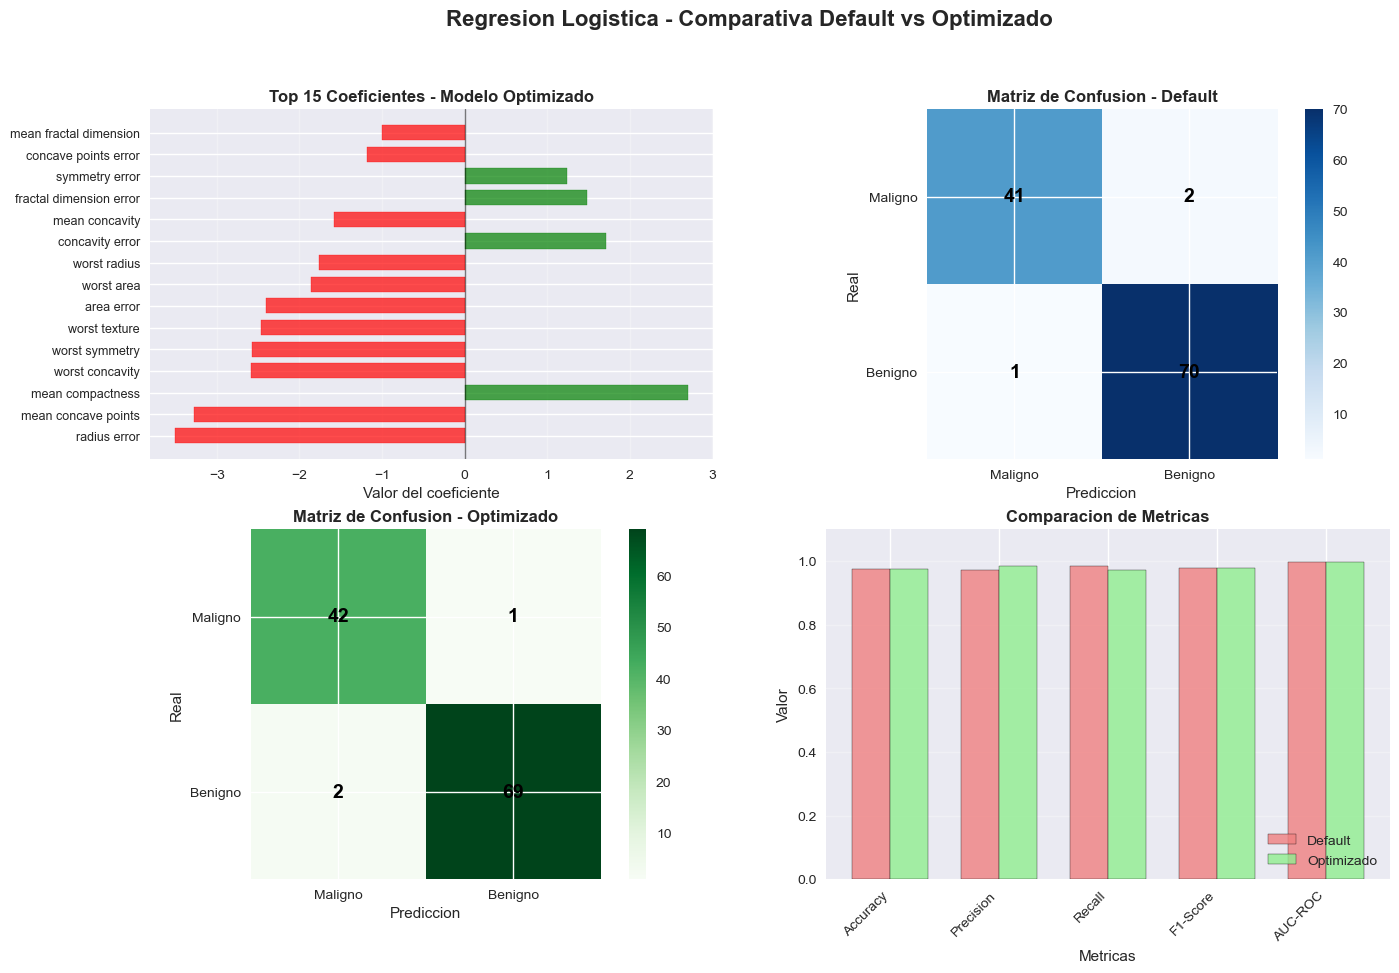

----------------------------------------
	   GRAFICAS
----------------------------------------


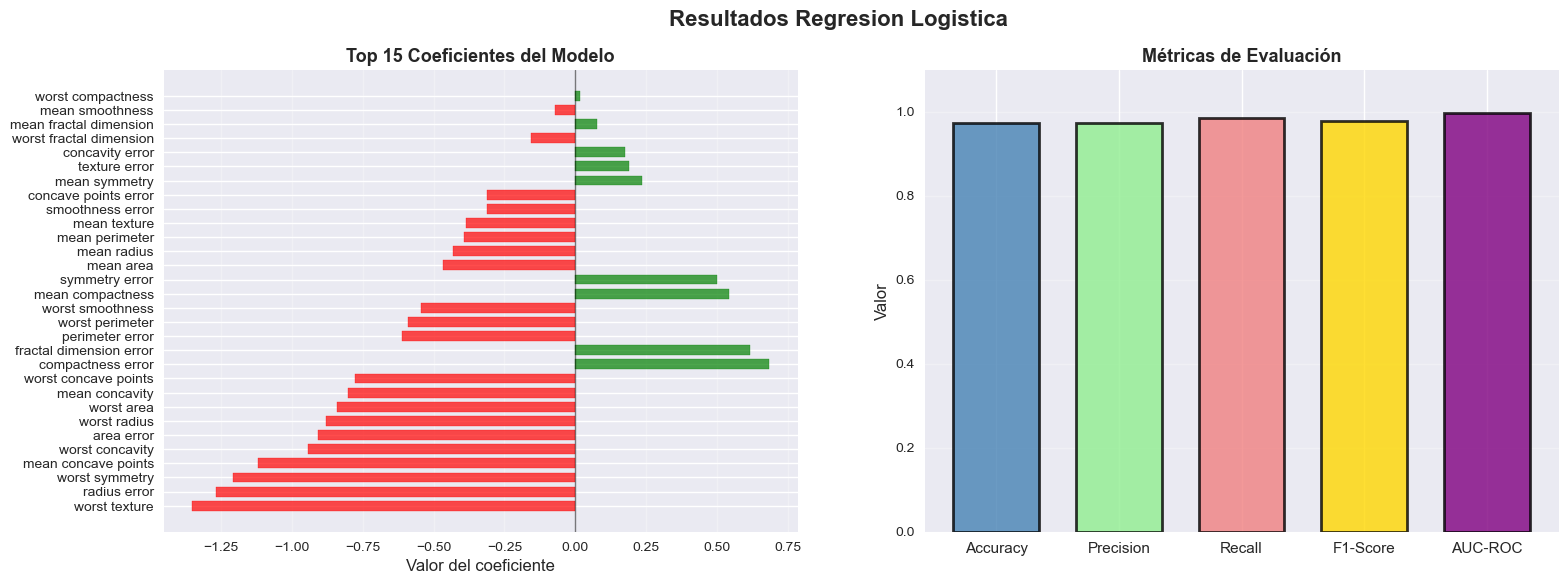

In [18]:
print("\tREGRESION\tLOGISTICA")
print("="*40)
print("\t ENTRENAMIENTO")
print("-"*40)
modelo_rl = LogisticRegression(random_state=42, max_iter=1000)
modelo_rl.fit(X_train_scaled, Y_train)
print("Modelo Regresion Logistica: Entrenado")

#coeficientes
print("   ** Coeficientes:")
print(f"  Intercepto: {modelo_rl.intercept_[0]:.4f}")
print("\n   ** Coeficientes de caracteristicas:")
for i, (coef, feature) in enumerate(zip(modelo_rl.coef_[0], X.columns), 1):
    signo = "+" if coef >= 0 else "-"
    print(f"  {i:2d}. {feature:25s}: {coef:10.4f}")

#predicciones
print("-"*40)
print("\tPREDICCIONES Y METRICAS")
print("-"*40)
Y_pred_rl = modelo_rl.predict(X_test_scaled)
Y_pred_proba_rl = modelo_rl.predict_proba(X_test_scaled)[:, 1]

#metricas
accuracy_rl = accuracy_score(Y_test, Y_pred_rl)
precision_rl = precision_score(Y_test, Y_pred_rl)
recall_rl = recall_score(Y_test, Y_pred_rl)
f1_rl = f1_score(Y_test, Y_pred_rl)
auc_roc_rl = roc_auc_score(Y_test, Y_pred_proba_rl)

print("   ** Metricas de evaluacion:")
print(f"\t• Accuracy:  {accuracy_rl:.4f}")
print(f"\t• Precision: {precision_rl:.4f}")
print(f"\t• Recall:    {recall_rl:.4f}")
print(f"\t• F1-Score:  {f1_rl:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_rl:.4f}")

# Matriz de confusión
cm_rl = confusion_matrix(Y_test, Y_pred_rl)
print(f"\n   ** Matriz de Confusión:")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_rl[0,0]:3d}  {cm_rl[0,1]:3d}")
print(f"\t     1  {cm_rl[1,0]:3d}  {cm_rl[1,1]:3d}")

#optimizacion gridSerachcv
print("\n" + "-"*40)
print("\tGRID SEARCH - OPTIMIZACION")
print("-"*40)

param_grid_rl = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'newton-cg', 'sag']
}

print("\n   ** Parametros a optimizar:")
for param, values in param_grid_rl.items():
    print(f"\t• {param}: {values}")

total_combinaciones = len(param_grid_rl['C']) * len(param_grid_rl['penalty']) * len(param_grid_rl['solver'])
print(f"\n   ** Total combinaciones: {total_combinaciones}")

print("\n..Iniciando GridSearchCV..")
grid_rl = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid_rl,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_rl.fit(X_train_scaled, Y_train)
print("...")
print("..")
print(".")
print("GridSearchCV completado")

print("\n   ** Mejores parametros encontrados:")
for param, value in grid_rl.best_params_.items():
    print(f"\t• {param}: {value}")
print(f"\t• Mejor F1-Score (CV): {grid_rl.best_score_:.4f}")

print("\n" + "-"*40)
print("\tMODELO OPTIMIZADO - EVALUACION")
print("-"*40)

modelo_rl_opt = grid_rl.best_estimator_
Y_pred_rl_opt = modelo_rl_opt.predict(X_test_scaled)
Y_pred_proba_rl_opt = modelo_rl_opt.predict_proba(X_test_scaled)[:, 1]

accuracy_rl_opt = accuracy_score(Y_test, Y_pred_rl_opt)
precision_rl_opt = precision_score(Y_test, Y_pred_rl_opt)
recall_rl_opt = recall_score(Y_test, Y_pred_rl_opt)
f1_rl_opt = f1_score(Y_test, Y_pred_rl_opt)
auc_roc_rl_opt = roc_auc_score(Y_test, Y_pred_proba_rl_opt)

print("   ** Metricas de evaluacion (Optimizado):")
print(f"\t• Accuracy:  {accuracy_rl_opt:.4f}")
print(f"\t• Precision: {precision_rl_opt:.4f}")
print(f"\t• Recall:    {recall_rl_opt:.4f}")
print(f"\t• F1-Score:  {f1_rl_opt:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_rl_opt:.4f}")

#mtraiz opt
cm_rl_opt = confusion_matrix(Y_test, Y_pred_rl_opt)
print(f"\n   ** Matriz de Confusion (Optimizado):")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_rl_opt[0,0]:3d}  {cm_rl_opt[0,1]:3d}")
print(f"\t     1  {cm_rl_opt[1,0]:3d}  {cm_rl_opt[1,1]:3d}")

print("-"*40)
print("\t   GRAFICAS COMPARATIVAS")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Regresion Logistica - Comparativa Default vs Optimizado', fontsize=16, fontweight='bold')

#coef
coeficientes = pd.Series(modelo_rl_opt.coef_[0], index=X.columns)
coeficientes_abs = coeficientes.abs().sort_values(ascending=False).head(15)
coeficientes_ordenados = coeficientes[coeficientes_abs.index]

bars = axes[0,0].barh(range(len(coeficientes_ordenados)), coeficientes_ordenados.values, height=0.7)
for i, (bar, val) in enumerate(zip(bars, coeficientes_ordenados.values)):
    if val >= 0:
        bar.set_color('green')
        bar.set_alpha(0.7)
    else:
        bar.set_color('red')
        bar.set_alpha(0.7)

axes[0,0].set_yticks(range(len(coeficientes_ordenados)))
axes[0,0].set_yticklabels(coeficientes_ordenados.index, fontsize=9)
axes[0,0].set_xlabel('Valor del coeficiente', fontsize=11)
axes[0,0].set_title('Top 15 Coeficientes - Modelo Optimizado', fontweight='bold', fontsize=12)
axes[0,0].axvline(x=0, color='black', linewidth=1, alpha=0.5)
axes[0,0].grid(True, alpha=0.3, axis='x')

#matriz
im1 = axes[0,1].imshow(cm_rl, interpolation='nearest', cmap=plt.cm.Blues)
axes[0,1].set_xticks([0, 1])
axes[0,1].set_yticks([0, 1])
axes[0,1].set_xticklabels(['Maligno', 'Benigno'])
axes[0,1].set_yticklabels(['Maligno', 'Benigno'])
axes[0,1].set_xlabel('Prediccion', fontsize=11)
axes[0,1].set_ylabel('Real', fontsize=11)
axes[0,1].set_title('Matriz de Confusion - Default', fontweight='bold', fontsize=12)
for i in range(2):
    for j in range(2):
        text = axes[0,1].text(j, i, cm_rl[i, j], ha="center", va="center", 
                             color="black", fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=axes[0,1])

#matriz opt 
im2 = axes[1,0].imshow(cm_rl_opt, interpolation='nearest', cmap=plt.cm.Greens)
axes[1,0].set_xticks([0, 1])
axes[1,0].set_yticks([0, 1])
axes[1,0].set_xticklabels(['Maligno', 'Benigno'])
axes[1,0].set_yticklabels(['Maligno', 'Benigno'])
axes[1,0].set_xlabel('Prediccion', fontsize=11)
axes[1,0].set_ylabel('Real', fontsize=11)
axes[1,0].set_title('Matriz de Confusion - Optimizado', fontweight='bold', fontsize=12)
for i in range(2):
    for j in range(2):
        text = axes[1,0].text(j, i, cm_rl_opt[i, j], ha="center", va="center", 
                             color="black", fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=axes[1,0])

#comparar
x = np.arange(5)
width = 0.35
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
valores_default = [accuracy_rl, precision_rl, recall_rl, f1_rl, auc_roc_rl]
valores_opt = [accuracy_rl_opt, precision_rl_opt, recall_rl_opt, f1_rl_opt, auc_roc_rl_opt]

bars1 = axes[1,1].bar(x - width/2, valores_default, width, label='Default', 
                      color='lightcoral', edgecolor='black', alpha=0.8)
bars2 = axes[1,1].bar(x + width/2, valores_opt, width, label='Optimizado', 
                      color='lightgreen', edgecolor='black', alpha=0.8)

axes[1,1].set_xlabel('Metricas', fontsize=11)
axes[1,1].set_ylabel('Valor', fontsize=11)
axes[1,1].set_title('Comparacion de Metricas', fontweight='bold', fontsize=12)
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metricas, rotation=45, ha='right')
axes[1,1].set_ylim([0, 1.1])
axes[1,1].legend(loc='lower right')
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.show()




print("-"*40)
print("\t   GRAFICAS")
print("-"*40)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Resultados Regresion Logistica', fontsize=16, fontweight='bold')

#Coeficientes del modleo
coeficientes = pd.Series(modelo_rl.coef_[0], index=X.columns)
coeficientes_abs = coeficientes.abs().sort_values(ascending=False)
coeficientes_ordenados = coeficientes[coeficientes_abs.index]

bars = axes[0].barh(range(len(coeficientes_ordenados)), coeficientes_ordenados.values, height=0.7)
for i, (bar, val) in enumerate(zip(bars, coeficientes_ordenados.values)):
    if val >= 0:
        bar.set_color('green')
        bar.set_alpha(0.7)
    else:
        bar.set_color('red')
        bar.set_alpha(0.7)

axes[0].set_yticks(range(len(coeficientes_ordenados)))
axes[0].set_yticklabels(coeficientes_ordenados.index, fontsize=10)
axes[0].set_xlabel('Valor del coeficiente', fontsize=12)
axes[0].set_title('Top 15 Coeficientes del Modelo', fontweight='bold', fontsize=13)
axes[0].axvline(x=0, color='black', linewidth=1, alpha=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

#comparacion metricas
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
valores = [accuracy_rl, precision_rl, recall_rl, f1_rl, auc_roc_rl]
colors = ['steelblue', 'lightgreen', 'lightcoral', 'gold', 'purple']

x_pos = np.arange(len(metricas))
bars = axes[1].bar(x_pos, valores, color=colors, edgecolor='black', linewidth=2, alpha=0.8, width=0.7)

axes[1].set_ylabel('Valor', fontsize=12)
axes[1].set_title('Métricas de Evaluación', fontweight='bold', fontsize=13)
axes[1].set_ylim([0, 1.1])
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(metricas, fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.show()

## 2. k-Nearest Neighbors

	k-VECINOS	CERCANOS (kNN)
	 ENTRENAMIENTO INICIAL
----------------------------------------
Modelo k-Nearest Neighbors (Default): Entrenado

   ** Parametros del modelo (Default):
  • n_neighbors: 5
  • weights: uniform
  • metric: minkowski
----------------------------------------
	PREDICCIONES Y METRICAS (DEFAULT)
----------------------------------------
   ** Metricas de evaluacion (Default):
	• Accuracy:  0.9474
	• Precision: 0.9577
	• Recall:    0.9577
	• F1-Score:  0.9577
	• AUC-ROC:   0.9820

   ** Matriz de Confusion (Default):
	        Predicho
	        0    1
	Real 0   40    3
	     1    3   68

----------------------------------------
	GRID SEARCH - OPTIMIZACION
----------------------------------------

   ** Parametros a optimizar:
	• n_neighbors: [3, 5, 7, 9, 11, 13, 15]
	• weights: ['uniform', 'distance']
	• metric: ['euclidean', 'manhattan']

   ** Total combinaciones: 28

..Iniciando GridSearchCV..
...
..
.
GridSearchCV completado

   ** Mejores parametros encontrados:
	

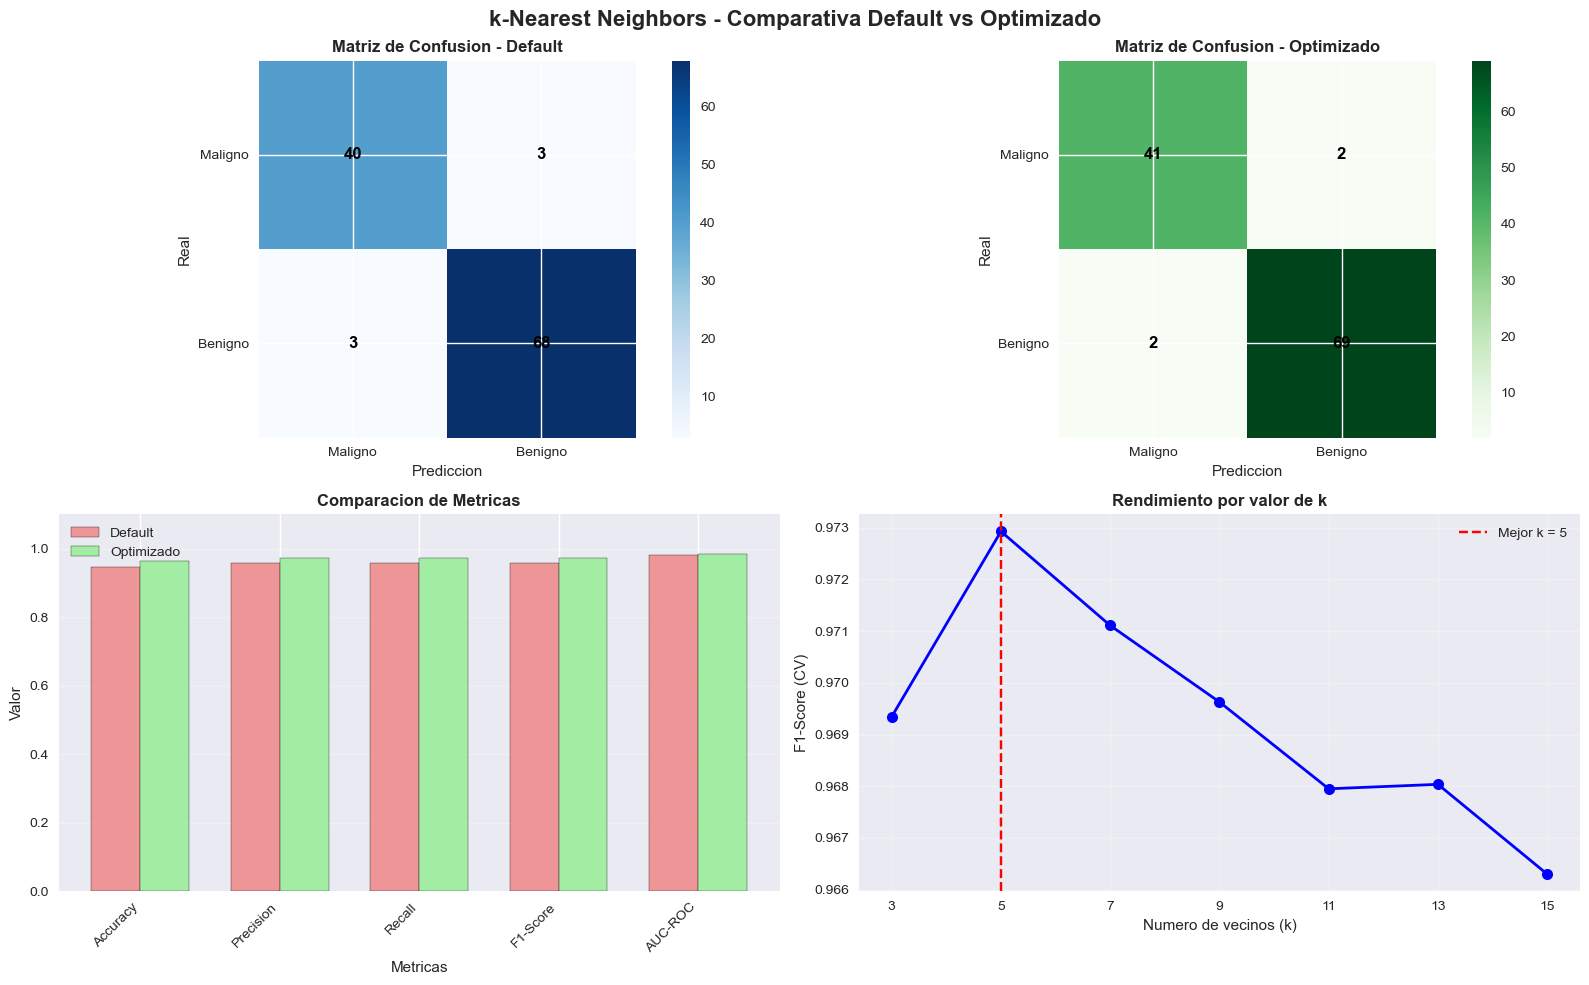

In [20]:
print("\tk-VECINOS\tCERCANOS (kNN)")
print("="*40)
print("\t ENTRENAMIENTO INICIAL")
print("-"*40)

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_train_scaled, Y_train)
print("Modelo k-Nearest Neighbors (Default): Entrenado\n")

print("   ** Parametros del modelo (Default):")
print(f"  • n_neighbors: {modeloKNN.n_neighbors}")
print(f"  • weights: {modeloKNN.weights}")
print(f"  • metric: {modeloKNN.metric}")

print("-"*40)
print("\tPREDICCIONES Y METRICAS (DEFAULT)")
print("-"*40)

Y_pred_KNN = modeloKNN.predict(X_test_scaled)
Y_pred_proba_KNN = modeloKNN.predict_proba(X_test_scaled)[:, 1]

accuracy_KNN = accuracy_score(Y_test, Y_pred_KNN)
precision_KNN = precision_score(Y_test, Y_pred_KNN)
recall_KNN = recall_score(Y_test, Y_pred_KNN)
f1_KNN = f1_score(Y_test, Y_pred_KNN)
auc_roc_KNN = roc_auc_score(Y_test, Y_pred_proba_KNN)

print("   ** Metricas de evaluacion (Default):")
print(f"\t• Accuracy:  {accuracy_KNN:.4f}")
print(f"\t• Precision: {precision_KNN:.4f}")
print(f"\t• Recall:    {recall_KNN:.4f}")
print(f"\t• F1-Score:  {f1_KNN:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_KNN:.4f}")

# Matriz de confusion inicial
cm_KNN = confusion_matrix(Y_test, Y_pred_KNN)
print(f"\n   ** Matriz de Confusion (Default):")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_KNN[0,0]:3d}  {cm_KNN[0,1]:3d}")
print(f"\t     1  {cm_KNN[1,0]:3d}  {cm_KNN[1,1]:3d}")

print("\n" + "-"*40)
print("\tGRID SEARCH - OPTIMIZACION")
print("-"*40)


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

print("\n   ** Parametros a optimizar:")
for param, values in param_grid_knn.items():
    print(f"\t• {param}: {values}")

total_combinaciones = len(param_grid_knn['n_neighbors']) * len(param_grid_knn['weights']) * len(param_grid_knn['metric'])
print(f"\n   ** Total combinaciones: {total_combinaciones}")

print("\n..Iniciando GridSearchCV..")
grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=0
)

grid_knn.fit(X_train_scaled, Y_train)
print("...")
print("..")
print(".")
print("GridSearchCV completado")

print("\n   ** Mejores parametros encontrados:")
for param, value in grid_knn.best_params_.items():
    print(f"\t• {param}: {value}")
print(f"\t• Mejor F1-Score (CV): {grid_knn.best_score_:.4f}")

print("\n" + "-"*40)
print("\nKNN OPTIMIZADO - EVALUACION")
print("-"*40)

modeloKNN_opt = grid_knn.best_estimator_
Y_pred_KNN_opt = modeloKNN_opt.predict(X_test_scaled)
Y_pred_proba_KNN_opt = modeloKNN_opt.predict_proba(X_test_scaled)[:, 1]

accuracy_KNN_opt = accuracy_score(Y_test, Y_pred_KNN_opt)
precision_KNN_opt = precision_score(Y_test, Y_pred_KNN_opt)
recall_KNN_opt = recall_score(Y_test, Y_pred_KNN_opt)
f1_KNN_opt = f1_score(Y_test, Y_pred_KNN_opt)
auc_roc_KNN_opt = roc_auc_score(Y_test, Y_pred_proba_KNN_opt)

print("   ** Metricas de evaluacion (Optimizado):")
print(f"\t• Accuracy:  {accuracy_KNN_opt:.4f}")
print(f"\t• Precision: {precision_KNN_opt:.4f}")
print(f"\t• Recall:    {recall_KNN_opt:.4f}")
print(f"\t• F1-Score:  {f1_KNN_opt:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_KNN_opt:.4f}")

#optimizad
cm_KNN_opt = confusion_matrix(Y_test, Y_pred_KNN_opt)
print(f"\n   ** Matriz de Confusion (Optimizado):")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_KNN_opt[0,0]:3d}  {cm_KNN_opt[0,1]:3d}")
print(f"\t     1  {cm_KNN_opt[1,0]:3d}  {cm_KNN_opt[1,1]:3d}")

print("-"*40)
print("\t   GRAFICAS")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('k-Nearest Neighbors - Comparativa Default vs Optimizado', fontsize=16, fontweight='bold')

#matriz default
im1 = axes[0,0].imshow(cm_KNN, interpolation='nearest', cmap=plt.cm.Blues)
axes[0,0].set_xticks([0, 1])
axes[0,0].set_yticks([0, 1])
axes[0,0].set_xticklabels(['Maligno', 'Benigno'])
axes[0,0].set_yticklabels(['Maligno', 'Benigno'])
axes[0,0].set_xlabel('Prediccion')
axes[0,0].set_ylabel('Real')
axes[0,0].set_title('Matriz de Confusion - Default', fontweight='bold')
for i in range(2):
    for j in range(2):
        text = axes[0,0].text(j, i, cm_KNN[i, j], ha="center", va="center", color="black", fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0,0])

#matriz opt
im2 = axes[0,1].imshow(cm_KNN_opt, interpolation='nearest', cmap=plt.cm.Greens)
axes[0,1].set_xticks([0, 1])
axes[0,1].set_yticks([0, 1])
axes[0,1].set_xticklabels(['Maligno', 'Benigno'])
axes[0,1].set_yticklabels(['Maligno', 'Benigno'])
axes[0,1].set_xlabel('Prediccion')
axes[0,1].set_ylabel('Real')
axes[0,1].set_title('Matriz de Confusion - Optimizado', fontweight='bold')
for i in range(2):
    for j in range(2):
        text = axes[0,1].text(j, i, cm_KNN_opt[i, j], ha="center", va="center", color="black", fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[0,1])

#copmarar metricas
x = np.arange(5)
width = 0.35
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
valores_default = [accuracy_KNN, precision_KNN, recall_KNN, f1_KNN, auc_roc_KNN]
valores_opt = [accuracy_KNN_opt, precision_KNN_opt, recall_KNN_opt, f1_KNN_opt, auc_roc_KNN_opt]

bars1 = axes[1,0].bar(x - width/2, valores_default, width, label='Default', color='lightcoral', edgecolor='black', alpha=0.8)
bars2 = axes[1,0].bar(x + width/2, valores_opt, width, label='Optimizado', color='lightgreen', edgecolor='black', alpha=0.8)

axes[1,0].set_xlabel('Metricas')
axes[1,0].set_ylabel('Valor')
axes[1,0].set_title('Comparacion de Metricas', fontweight='bold')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(metricas, rotation=45, ha='right')
axes[1,0].set_ylim([0, 1.1])
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3, axis='y')

#coparar
k_values = param_grid_knn['n_neighbors']
cv_results = grid_knn.cv_results_
scores_por_k = {}

for k in k_values:
    indices = [i for i, params in enumerate(grid_knn.cv_results_['params']) if params['n_neighbors'] == k]
    scores = [grid_knn.cv_results_['mean_test_score'][i] for i in indices]
    scores_por_k[k] = max(scores) if scores else 0

ks = list(scores_por_k.keys())
f1_scores = list(scores_por_k.values())

axes[1,1].plot(ks, f1_scores, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8)
axes[1,1].axvline(x=grid_knn.best_params_['n_neighbors'], color='red', linestyle='--', 
                  label=f"Mejor k = {grid_knn.best_params_['n_neighbors']}")
axes[1,1].set_xlabel('Numero de vecinos (k)', fontsize=11)
axes[1,1].set_ylabel('F1-Score (CV)', fontsize=11)
axes[1,1].set_title('Rendimiento por valor de k', fontweight='bold')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(ks)

plt.tight_layout()
plt.show()

## 3. Random Forest para Clasificacion

	RANDOM	FOREST
	 ENTRENAMIENTO INICIAL
----------------------------------------
Modelo Random Forest (Default): Entrenado

   ** Importancia de caracteristicas (Top 10) - Default:
   1. worst area               :   0.1539 (15.4%)
   2. worst concave points     :   0.1447 (14.5%)
   3. mean concave points      :   0.1062 (10.6%)
   4. worst radius             :   0.0780 (7.8%)
   5. mean concavity           :   0.0680 (6.8%)
   6. worst perimeter          :   0.0671 (6.7%)
   7. mean perimeter           :   0.0533 (5.3%)
   8. mean radius              :   0.0487 (4.9%)
   9. mean area                :   0.0476 (4.8%)
  10. worst concavity          :   0.0318 (3.2%)
----------------------------------------
	PREDICCIONES Y METRICAS (DEFAULT)
----------------------------------------
   ** Metricas de evaluacion (Default):
	• Accuracy:  0.9649
	• Precision: 0.9589
	• Recall:    0.9859
	• F1-Score:  0.9722
	• AUC-ROC:   0.9953

   ** Matriz de Confusion (Default):
	        Predicho
	        

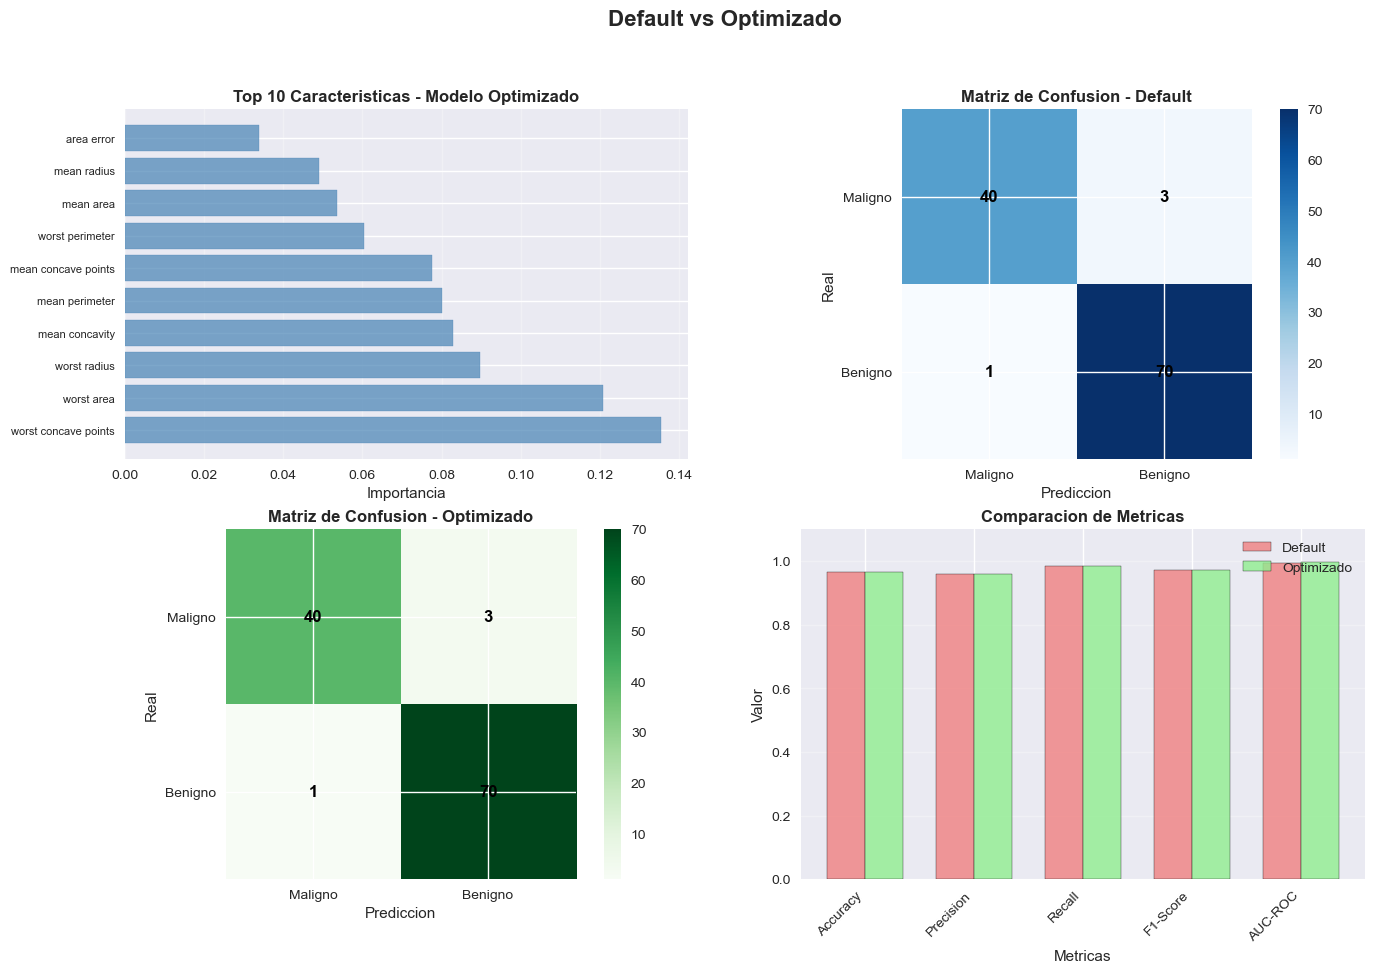

In [22]:
print("\tRANDOM\tFOREST")
print("="*40)
print("\t ENTRENAMIENTO INICIAL")
print("-"*40)

modeloRFC = RandomForestClassifier(random_state=42, n_jobs=-1)
modeloRFC.fit(X_train, Y_train)  # NO necesita escalado
print("Modelo Random Forest (Default): Entrenado\n")

print("   ** Importancia de caracteristicas (Top 10) - Default:")
importancias = pd.Series(modeloRFC.feature_importances_, index=X.columns)
importancias_ordenadas = importancias.sort_values(ascending=False)

for i, (feature, imp) in enumerate(importancias_ordenadas.head(10).items(), 1):
    print(f"  {i:2d}. {feature:25s}: {imp:8.4f} ({imp*100:.1f}%)")

print("-"*40)
print("\tPREDICCIONES Y METRICAS (DEFAULT)")
print("-"*40)

Y_pred_RFC = modeloRFC.predict(X_test)
Y_pred_proba_RFC = modeloRFC.predict_proba(X_test)[:, 1]

accuracy_RFC = accuracy_score(Y_test, Y_pred_RFC)
precision_RFC = precision_score(Y_test, Y_pred_RFC)
recall_RFC = recall_score(Y_test, Y_pred_RFC)
f1_RFC = f1_score(Y_test, Y_pred_RFC)
auc_roc_RFC = roc_auc_score(Y_test, Y_pred_proba_RFC)

print("   ** Metricas de evaluacion (Default):")
print(f"\t• Accuracy:  {accuracy_RFC:.4f}")
print(f"\t• Precision: {precision_RFC:.4f}")
print(f"\t• Recall:    {recall_RFC:.4f}")
print(f"\t• F1-Score:  {f1_RFC:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_RFC:.4f}")

# Matriz de confusion inicial
cm_RFC = confusion_matrix(Y_test, Y_pred_RFC)
print(f"\n   ** Matriz de Confusion (Default):")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_RFC[0,0]:3d}  {cm_RFC[0,1]:3d}")
print(f"\t     1  {cm_RFC[1,0]:3d}  {cm_RFC[1,1]:3d}")

print("\n" + "-"*40)
print("\tGRID SEARCH - OPTIMIZACION")
print("-"*40)

param_grid_rf = {
    'n_estimators': [100, 150],  # Reducido para hacerlo factible
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

print("\n   ** Parametros a optimizar:")
for param, values in param_grid_rf.items():
    print(f"\t• {param}: {values}")

total_combinaciones = (len(param_grid_rf['n_estimators']) * 
                      len(param_grid_rf['max_depth']) * 
                      len(param_grid_rf['min_samples_split']) * 
                      len(param_grid_rf['min_samples_leaf']) * 
                      len(param_grid_rf['max_features']))
print(f"\n   ** Total combinaciones: {total_combinaciones}")
print(f"   ** Total entrenamientos (con CV=5): {total_combinaciones * 5}")
print(f"   ** Scoring: F1-Score (balance entre precision y recall)")
print(f"   ** CV=5: Validacion cruzada con 5 particiones")
print(f"   ** n_jobs=-1: Usando todos los cores disponibles")

print("\n..Iniciando GridSearchCV..")

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, Y_train)
print("...")
print("..")
print(".")
print("GridSearchCV completado")

print("\n   ** Mejores parametros encontrados:")
for param, value in grid_rf.best_params_.items():
    print(f"\t• {param}: {value}")
print(f"\t• Mejor F1-Score (CV): {grid_rf.best_score_:.4f}")

# Evaluar modelo optimizado
print("\n" + "-"*40)
print("\tMODELO OPTIMIZADO - EVALUACION")
print("-"*40)

modeloRFC_opt = grid_rf.best_estimator_
Y_pred_RFC_opt = modeloRFC_opt.predict(X_test)
Y_pred_proba_RFC_opt = modeloRFC_opt.predict_proba(X_test)[:, 1]

accuracy_RFC_opt = accuracy_score(Y_test, Y_pred_RFC_opt)
precision_RFC_opt = precision_score(Y_test, Y_pred_RFC_opt)
recall_RFC_opt = recall_score(Y_test, Y_pred_RFC_opt)
f1_RFC_opt = f1_score(Y_test, Y_pred_RFC_opt)
auc_roc_RFC_opt = roc_auc_score(Y_test, Y_pred_proba_RFC_opt)

print("   ** Metricas de evaluacion (Optimizado):")
print(f"\t• Accuracy:  {accuracy_RFC_opt:.4f}")
print(f"\t• Precision: {precision_RFC_opt:.4f}")
print(f"\t• Recall:    {recall_RFC_opt:.4f}")
print(f"\t• F1-Score:  {f1_RFC_opt:.4f}")
print(f"\t• AUC-ROC:   {auc_roc_RFC_opt:.4f}")

#matriz opt
cm_RFC_opt = confusion_matrix(Y_test, Y_pred_RFC_opt)
print(f"\n   ** Matriz de Confusion (Optimizado):")
print(f"\t        Predicho")
print(f"\t        0    1")
print(f"\tReal 0  {cm_RFC_opt[0,0]:3d}  {cm_RFC_opt[0,1]:3d}")
print(f"\t     1  {cm_RFC_opt[1,0]:3d}  {cm_RFC_opt[1,1]:3d}")

print("-"*40)
print("\t   GRAFICAS COMPARATIVAS")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Default vs Optimizado', fontsize=16, fontweight='bold')

#caracterizticas imporantcia, opt
importancias_opt = pd.Series(modeloRFC_opt.feature_importances_, index=X.columns)
importancias_opt_ordenadas = importancias_opt.sort_values(ascending=False).head(10)

bars = axes[0,0].barh(range(len(importancias_opt_ordenadas)), importancias_opt_ordenadas.values)
for i, (bar, val) in enumerate(zip(bars, importancias_opt_ordenadas.values)):
    bar.set_color('steelblue')
    bar.set_alpha(0.7)

axes[0,0].set_yticks(range(len(importancias_opt_ordenadas)))
axes[0,0].set_yticklabels(importancias_opt_ordenadas.index, fontsize=8)
axes[0,0].set_xlabel('Importancia', fontsize=11)
axes[0,0].set_title('Top 10 Caracteristicas - Modelo Optimizado', fontweight='bold', fontsize=12)
axes[0,0].grid(True, alpha=0.3, axis='x')

#matriz defualt
im1 = axes[0,1].imshow(cm_RFC, interpolation='nearest', cmap=plt.cm.Blues)
axes[0,1].set_xticks([0, 1])
axes[0,1].set_yticks([0, 1])
axes[0,1].set_xticklabels(['Maligno', 'Benigno'])
axes[0,1].set_yticklabels(['Maligno', 'Benigno'])
axes[0,1].set_xlabel('Prediccion')
axes[0,1].set_ylabel('Real')
axes[0,1].set_title('Matriz de Confusion - Default', fontweight='bold')
for i in range(2):
    for j in range(2):
        text = axes[0,1].text(j, i, cm_RFC[i, j], ha="center", va="center", color="black", fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0,1])

#matriz conf, opt
im2 = axes[1,0].imshow(cm_RFC_opt, interpolation='nearest', cmap=plt.cm.Greens)
axes[1,0].set_xticks([0, 1])
axes[1,0].set_yticks([0, 1])
axes[1,0].set_xticklabels(['Maligno', 'Benigno'])
axes[1,0].set_yticklabels(['Maligno', 'Benigno'])
axes[1,0].set_xlabel('Prediccion')
axes[1,0].set_ylabel('Real')
axes[1,0].set_title('Matriz de Confusion - Optimizado', fontweight='bold')
for i in range(2):
    for j in range(2):
        text = axes[1,0].text(j, i, cm_RFC_opt[i, j], ha="center", va="center", color="black", fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[1,0])

#comparacion metricas
x = np.arange(5)
width = 0.35
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
valores_default = [accuracy_RFC, precision_RFC, recall_RFC, f1_RFC, auc_roc_RFC]
valores_opt = [accuracy_RFC_opt, precision_RFC_opt, recall_RFC_opt, f1_RFC_opt, auc_roc_RFC_opt]

bars1 = axes[1,1].bar(x - width/2, valores_default, width, label='Default', color='lightcoral', edgecolor='black', alpha=0.8)
bars2 = axes[1,1].bar(x + width/2, valores_opt, width, label='Optimizado', color='lightgreen', edgecolor='black', alpha=0.8)

axes[1,1].set_xlabel('Metricas')
axes[1,1].set_ylabel('Valor')
axes[1,1].set_title('Comparacion de Metricas', fontweight='bold')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metricas, rotation=45, ha='right')
axes[1,1].set_ylim([0, 1.1])
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.show()

## 4. Comparacion modelos

	COMPARACION MODELOS
                            Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
               Regresion Logistica    0.9737     0.9722  0.9859    0.9790   0.9974
Regresion Logistica (GridSearchCV)    0.9737     0.9857  0.9718    0.9787   0.9961
                               kNN    0.9474     0.9577  0.9577    0.9577   0.9820
                kNN (GridSearchCV)    0.9649     0.9718  0.9718    0.9718   0.9831
                     Random Forest    0.9649     0.9589  0.9859    0.9722   0.9953
      Random Forest (GridSearchCV)    0.9649     0.9589  0.9859    0.9722   0.9974

• Mejor Accuracy: Regresion Logistica (0.9737)
• Mejor Precision: Regresion Logistica (GridSearchCV) (0.9857)
• Mejor Recall: Regresion Logistica (0.9859)
• Mejor F1-Score: Regresion Logistica (0.9790)
• Mejor AUC-ROC: Regresion Logistica (0.9974)

	RESUMEN DE RESULTADOS
** MEJOR MODELO: Regresion Logistica
• F1-Score: 0.9790
• Accuracy: 0.9737
• AUC-ROC:  0.9974
-------------------------------

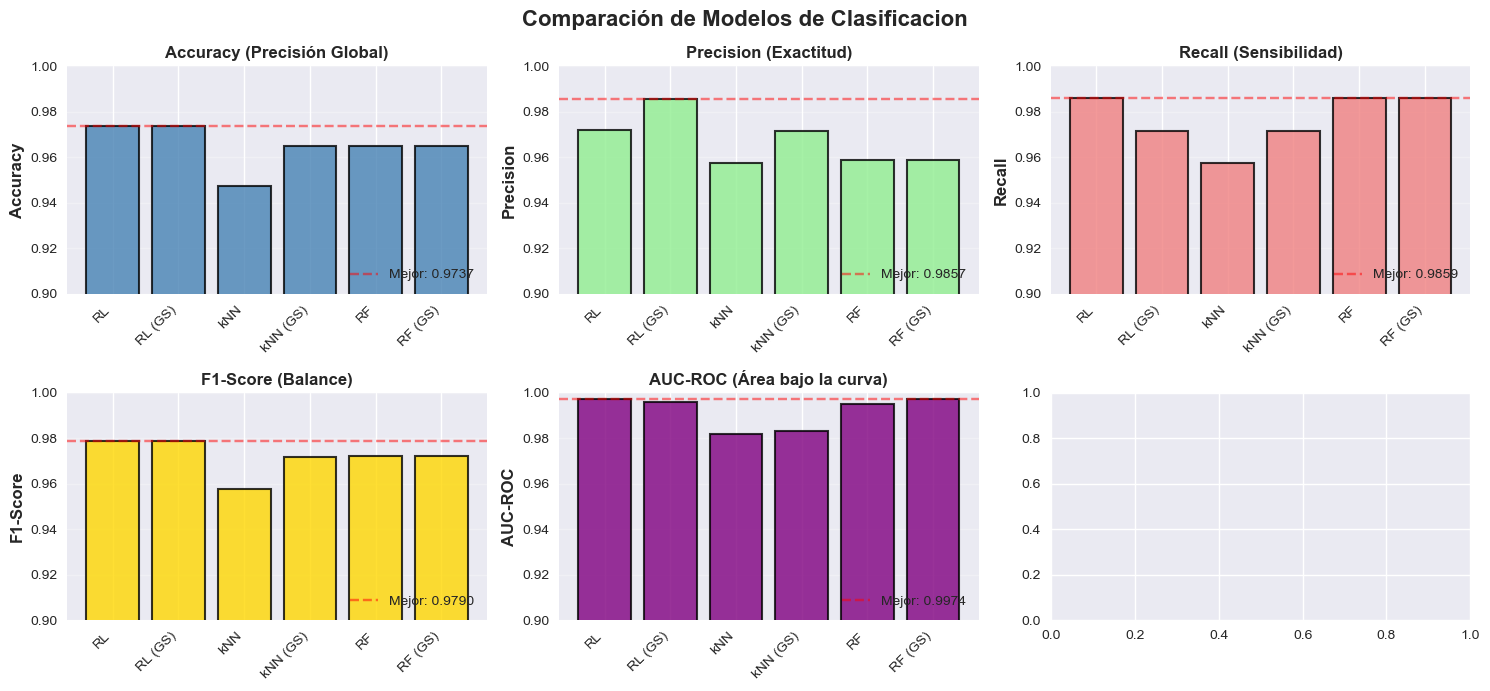

In [24]:
print("\tCOMPARACION MODELOS")
print("="*40)

comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresion Logistica', 'Regresion Logistica (GridSearchCV)','kNN', 'kNN (GridSearchCV)','Random Forest', 'Random Forest (GridSearchCV)'],
    'Accuracy': [accuracy_rl, accuracy_rl_opt, accuracy_KNN, accuracy_KNN_opt, accuracy_RFC, accuracy_RFC_opt],
    'Precision': [precision_rl, precision_rl_opt, precision_KNN, precision_KNN_opt, precision_RFC, precision_RFC_opt],
    'Recall': [recall_rl, recall_rl_opt, recall_KNN, recall_KNN_opt, recall_RFC, recall_RFC_opt],
    'F1-Score': [f1_rl, f1_rl_opt, f1_KNN, f1_KNN_opt, f1_RFC, f1_RFC_opt],
    'AUC-ROC': [auc_roc_rl, auc_roc_rl_opt, auc_roc_KNN, auc_roc_KNN_opt, auc_roc_RFC, auc_roc_RFC_opt]
})

print(comparacion_modelos.round(4).to_string(index=False))

#mejores datos
print(f"\n• Mejor Accuracy: {comparacion_modelos.loc[comparacion_modelos['Accuracy'].idxmax(), 'Modelo']} ({comparacion_modelos['Accuracy'].max():.4f})")
print(f"• Mejor Precision: {comparacion_modelos.loc[comparacion_modelos['Precision'].idxmax(), 'Modelo']} ({comparacion_modelos['Precision'].max():.4f})")
print(f"• Mejor Recall: {comparacion_modelos.loc[comparacion_modelos['Recall'].idxmax(), 'Modelo']} ({comparacion_modelos['Recall'].max():.4f})")
print(f"• Mejor F1-Score: {comparacion_modelos.loc[comparacion_modelos['F1-Score'].idxmax(), 'Modelo']} ({comparacion_modelos['F1-Score'].max():.4f})")
print(f"• Mejor AUC-ROC: {comparacion_modelos.loc[comparacion_modelos['AUC-ROC'].idxmax(), 'Modelo']} ({comparacion_modelos['AUC-ROC'].max():.4f})")

print("\n" + "="*50)
print("\tRESUMEN DE RESULTADOS")
print("="*50)

#mejor modelo (por f1)
mejor_f1_idx = comparacion_modelos['F1-Score'].idxmax()
mejor_modelo = comparacion_modelos.loc[mejor_f1_idx, 'Modelo']
mejor_f1 = comparacion_modelos.loc[mejor_f1_idx, 'F1-Score']
mejor_accuracy = comparacion_modelos.loc[mejor_f1_idx, 'Accuracy']
mejor_auc = comparacion_modelos.loc[mejor_f1_idx, 'AUC-ROC']

print(f"** MEJOR MODELO: {mejor_modelo}")
print(f"• F1-Score: {mejor_f1:.4f}")
print(f"• Accuracy: {mejor_accuracy:.4f}")
print(f"• AUC-ROC:  {mejor_auc:.4f}")

print("-"*40)
print("\t GRAFICAS")
print("-"*40)
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
fig.suptitle('Comparación de Modelos de Clasificacion', fontsize=16, fontweight='bold')

modelos_nombres = comparacion_modelos['Modelo'].values
modelos_cortos = ['RL', 'RL (GS)', 'kNN', 'kNN (GS)', 'RF', 'RF (GS)']
x = np.arange(len(modelos_cortos))

#comparar accuracy
bars1 = axes[0,0].bar(x, comparacion_modelos['Accuracy'], color='steelblue', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0,0].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[0,0].set_title('Accuracy (Precisión Global)', fontweight='bold', fontsize=12)
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(modelos_cortos, rotation=45, ha='right')
axes[0,0].set_ylim([0.9, 1.0])  # Ajustado para mejor visualización
axes[0,0].axhline(y=comparacion_modelos['Accuracy'].max(), color='red', linestyle='--', alpha=0.5, 
                  label=f"Mejor: {comparacion_modelos['Accuracy'].max():.4f}")
axes[0,0].grid(True, alpha=0.3, axis='y')
axes[0,0].legend(loc='lower right')

#comparar Precision
bars2 = axes[0,1].bar(x, comparacion_modelos['Precision'], color='lightgreen', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0,1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[0,1].set_title('Precision (Exactitud)', fontweight='bold', fontsize=12)
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(modelos_cortos, rotation=45, ha='right')
axes[0,1].set_ylim([0.9, 1.0])
axes[0,1].axhline(y=comparacion_modelos['Precision'].max(), color='red', linestyle='--', alpha=0.5,
                  label=f"Mejor: {comparacion_modelos['Precision'].max():.4f}")
axes[0,1].grid(True, alpha=0.3, axis='y')
axes[0,1].legend(loc='lower right')

#comparar recall
bars3 = axes[0,2].bar(x, comparacion_modelos['Recall'], color='lightcoral', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0,2].set_ylabel('Recall', fontsize=12, fontweight='bold')
axes[0,2].set_title('Recall (Sensibilidad)', fontweight='bold', fontsize=12)
axes[0,2].set_xticks(x)
axes[0,2].set_xticklabels(modelos_cortos, rotation=45, ha='right')
axes[0,2].set_ylim([0.9, 1.0])
axes[0,2].axhline(y=comparacion_modelos['Recall'].max(), color='red', linestyle='--', alpha=0.5,
                  label=f"Mejor: {comparacion_modelos['Recall'].max():.4f}")
axes[0,2].grid(True, alpha=0.3, axis='y')
axes[0,2].legend(loc='lower right')

#comparar f1
bars4 = axes[1,0].bar(x, comparacion_modelos['F1-Score'], color='gold', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[1,0].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1,0].set_title('F1-Score (Balance)', fontweight='bold', fontsize=12)
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(modelos_cortos, rotation=45, ha='right')
axes[1,0].set_ylim([0.9, 1.0])
axes[1,0].axhline(y=comparacion_modelos['F1-Score'].max(), color='red', linestyle='--', alpha=0.5,
                  label=f"Mejor: {comparacion_modelos['F1-Score'].max():.4f}")
axes[1,0].grid(True, alpha=0.3, axis='y')
axes[1,0].legend(loc='lower right')


#comparacion auc roc
bars5 = axes[1,1].bar(x, comparacion_modelos['AUC-ROC'], color='purple', edgecolor='black', linewidth=1.5, alpha=0.8)
axes[1,1].set_ylabel('AUC-ROC', fontsize=12, fontweight='bold')
axes[1,1].set_title('AUC-ROC (Área bajo la curva)', fontweight='bold', fontsize=12)
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(modelos_cortos, rotation=45, ha='right')
axes[1,1].set_ylim([0.9, 1.0])
axes[1,1].axhline(y=comparacion_modelos['AUC-ROC'].max(), color='red', linestyle='--', alpha=0.5,
                  label=f"Mejor: {comparacion_modelos['AUC-ROC'].max():.4f}")
axes[1,1].grid(True, alpha=0.3, axis='y')
axes[1,1].legend(loc='lower right')

fig.tight_layout()
plt.show()

## Conclusiones

In [47]:
print("\n" + "="*40)
print("REGRESION")
print("="*40)

resultados_regresion = pd.DataFrame({
    'Modelo': [
        'RegresiOn Lineal',
        'Arbol Decision',
        'Arbol Decision (GS)',
        'Random Forest',
        'Random Forest (GS)'
    ],
    'MAE': [0.5332, 0.4547, 0.4311, 0.3275, 0.3310],
    'RMSE': [0.7456, 0.7037, 0.6391, 0.5053, 0.4981],
    'R2': [0.5758, 0.6221, 0.6883, 0.8051, 0.8107]
})

#mejores hiperparam
hiperparametros_regresion = {
    'Arbol Decision (GS)': {
        'max_depth': 10,
        'max_features': None,
        'min_samples_leaf': 4,
        'min_samples_split': 2
    },
    'Random Forest (GS)': {
        'n_estimators': 150,
        'max_depth': 20,
        'max_features': 'sqrt',
        'min_samples_leaf': 1,
        'min_samples_split': 2
    }
}

print("-"*40)
print("\t TABLA COMPARACION REGRESION")
print("-"*40)
print(resultados_regresion.round(4).to_string(index=False))

print("\nMEJORES HIPERPARÁMETROS - REGRESION")
print("-" * 50)
print("Arbol de Decision Optimizado:")
for p, v in hiperparametros_regresion['Arbol Decision (GS)'].items():
    print(f"\t• {p}: {v}")
print("\nRandom Forest Optimizado:")
for p, v in hiperparametros_regresion['Random Forest (GS)'].items():
    print(f"\t• {p}: {v}")

#mejores metricas
mejor_r2 = resultados_regresion.loc[resultados_regresion['R2'].idxmax()]
mejor_rmse = resultados_regresion.loc[resultados_regresion['RMSE'].idxmin()]

print("\n\t**MODELO GANADOR: RANDOM FOREST**")
print(f"\t\t•R2 = {mejor_r2['R2']:.4f}")
print(f"\t\t•RMSE = {mejor_r2['RMSE']:.4f}")
print(f"\t\t•MAE = {mejor_r2['MAE']:.4f}")

print("\n" + "="*40)
print("CLASIFICACION")
print("="*40)

resultados_clasificacion = pd.DataFrame({
    'Modelo': [
        'Regresión Logistica',
        'RL (GridSearch)',
        'kNN',
        'kNN (GridSearch)',
        'Random Forest',
        'RF (GridSearch)'
    ],
    'Accuracy': [0.9737, 0.9737, 0.9474, 0.9649, 0.9649, 0.9649],
    'Precision': [0.9722, 0.9857, 0.9577, 0.9718, 0.9589, 0.9589],
    'Recall': [0.9859, 0.9718, 0.9577, 0.9718, 0.9859, 0.9859],
    'F1-Score': [0.9790, 0.9787, 0.9577, 0.9718, 0.9722, 0.9722],
    'AUC-ROC': [0.9974, 0.9961, 0.9820, 0.9831, 0.9953, 0.9974]
})

#mejres hiper (GS)
hiperparametros_clasificacion = {
    'RL (GridSearch)': {
        'C': 10,
        'penalty': 'l2',
        'solver': 'lbfgs'
    },
    'kNN (GridSearch)': {
        'n_neighbors': 5,
        'weights': 'uniform',
        'metric': 'manhattan'
    },
    'RF (GridSearch)': {
        'n_estimators': 100,
        'max_depth': 10,
        'max_features': 'log2',
        'min_samples_leaf': 1,
        'min_samples_split': 5
    }
}

print("-"*40)
print("\t TABLA COMPARACION CLASIFICACION")
print("-"*40)
print(resultados_clasificacion.round(4).to_string(index=False))
print("\nMEJORES HIPERPARAMETROS - CLASIFICACION")
print("-" * 60)
print("Regresion Logistica Optimizada:")
for p, v in hiperparametros_clasificacion['RL (GridSearch)'].items():
    print(f"\t•{p}: {v}")
print("\nkNN Optimizado:")
for p, v in hiperparametros_clasificacion['kNN (GridSearch)'].items():
    print(f"\t•{p}: {v}")
print("\nRandom Forest Optimizado:")
for p, v in hiperparametros_clasificacion['RF (GridSearch)'].items():
    print(f"\t•{p}: {v}")

#mejores metricas
mejor_f1 = resultados_clasificacion.loc[resultados_clasificacion['F1-Score'].idxmax()]
mejor_auc = resultados_clasificacion.loc[resultados_clasificacion['AUC-ROC'].idxmax()]

print("\n**MODELO GANADOR: REGRESION LOGÍSTICA**")
print(f"\t•F1-Score = {mejor_f1['F1-Score']:.4f}")
print(f"\t•Accuracy = {mejor_f1['Accuracy']:.4f}")
print(f"\t•AUC-ROC = {mejor_f1['AUC-ROC']:.4f}")


REGRESION
----------------------------------------
	 TABLA COMPARACION REGRESION
----------------------------------------
             Modelo    MAE   RMSE     R2
   RegresiOn Lineal 0.5332 0.7456 0.5758
     Arbol Decision 0.4547 0.7037 0.6221
Arbol Decision (GS) 0.4311 0.6391 0.6883
      Random Forest 0.3275 0.5053 0.8051
 Random Forest (GS) 0.3310 0.4981 0.8107

MEJORES HIPERPARÁMETROS - REGRESION
--------------------------------------------------
Arbol de Decision Optimizado:
	• max_depth: 10
	• max_features: None
	• min_samples_leaf: 4
	• min_samples_split: 2

Random Forest Optimizado:
	• n_estimators: 150
	• max_depth: 20
	• max_features: sqrt
	• min_samples_leaf: 1
	• min_samples_split: 2

	**MODELO GANADOR: RANDOM FOREST**
		•R2 = 0.8107
		•RMSE = 0.4981
		•MAE = 0.3310

CLASIFICACION
----------------------------------------
	 TABLA COMPARACION CLASIFICACION
----------------------------------------
             Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
Regresión 

#### Justificacion metricas:
**Regresion**
- **MAE:** Mide el error promedio en las mismas unidades que la variable objetivo
- **RMSE:** Castiga más los errores grandes, y es util para detectar predicciones muy desviadas
- **R2:** Indica la proporción de la varianza explicada por el modelo, ayuda a comparar modelos independientemente de la escala de los datos

**Clasificacion**
- **ACCURACY:** Proporción de aciertos totales, 
- **PRECISION:** Mide la exactitud de las predicciones positivas, minimiza falsos positivos
- **RECALL:** Mide capacidad de detectar positivos reales y tambien minimiza falsos positivos
- **F1 SCORE:** Media entre Recall y precision, rincipal en problemas desbalanceados.
- **AUC-ROC:** Mide la capacidad discriminativa del modelo, es independiente del umbral de clasificacion

#### Sobreajuste, generalización y limitaciones de los modelos:

Todos los modelos fueron optimizados con GridSearchCV y 5 particiones, esta cantidad da un funcionamiento estable. La diferencia entre CV y test indica que la generalizacion se dio correctamente.

La distribucion de datos en 80/20 para train/test es estandar para los modelos. Ademas random_state = 42 ayuda con reproductibilidad de los resultados

- **Arbol de decision:** La version default tuvo una varianza alta, significando que R2 tes es menor que train. Al aplicar la optimizacion se mejoró R2, reduciendo el sobreajuste
- **kNN:** Al lidiar con las distancias de datos escalar las distancias es un proceso vital, se destacó la distancia Manhattan al superar la Euclidiana
- **Random Forest:** Robusto al sobreajuste, no hubo grandes mejoras con la optimizacion por lo que el modelo ya tenía una base estable

Las limitaciones que podemos encontrar son:
    - Breast_Cancer es bastante pequeño, lo que podría causar sensibilidad ante particiones
    - kNN es computacionalmente costoso

#### Conclusiones Generales:
    - El mejor modelo que obutvimos fue Random Forest y Regresion logistica, para sus respectivos tipos de problemas
    - En el problema de regresion la variable más importante es MedInc (ingreso medio)
    - En el problema de clasificacion se prioriza minimizar falsos negativos y las variables mas importantes fueron: worst texture, radius error, worst symmetry, mean concave points